In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
xs = np.linspace(-2, 3.5, 50)
ys = np.linspace(-2, 3.5, 50)

In [10]:
f1 = lambda x, y: 2*x + 3*y + 1
grad_f1 = lambda x, y: np.array([2, 3]).T

f2 = lambda x, y: x ** 2 + y ** 2 - x * y -5
grad_f2 = lambda x, y: np.array([2*x-y, 2*y-x]).T

f3 = lambda x, y: (x-5) * np.cos(y - 5) - (y - 5) * np.sin(x-5)
grad_f3 = lambda x, y: np.array([np.cos(y-5)-(y-5)*np.cos(x-5), -(x-5)*np.sin(y-5)-np.sin(x-5)]).T

In [11]:
def levelset(xs, ys, x, y, f, grad_f):
    gridx, gridy = np.meshgrid(xs, ys)
    c = f(x, y)
    grad = grad_f(x, y)
    tangent = -grad[0]/grad[1] * (xs - 1)
    plt.contour(xs, ys, f(gridx, gridy), [c-5, c, c+5])
    plt.quiver(1, 0, grad[0], grad[1])
    plt.plot(xs, tangent, '--', linewidth=2)
    plt.ylim([np.min(ys), np.max(ys)])

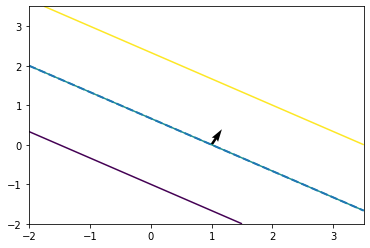

In [12]:
levelset(xs, ys, 1, 0, f1, grad_f1)

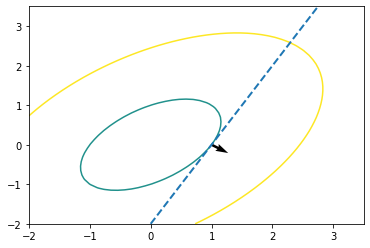

In [13]:
levelset(xs, ys, 1, 0, f2, grad_f2)

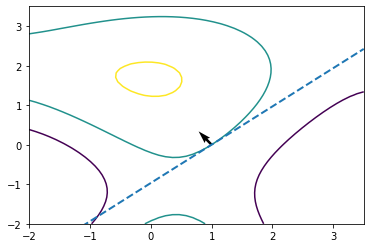

In [14]:
levelset(xs, ys, 1, 0, f3, grad_f3)

In [26]:
def linearapprox(xs, ys, x, y, f, grad_f):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(30, -50)
    gridx, gridy = np.meshgrid(xs, ys)
    gridz = f(gridx, gridy)
    grad = grad_f(x, y)
    tangent = lambda xn, yn: f(x, y) + (xn - x) * grad[0] + (yn - y) * grad[1]
    ax.plot_surface(gridx, gridy, f(gridx, gridy), zorder=1, alpha=0.4)
    ax.contour(xs, ys, gridz, offset=np.min(gridz), zorder=-1)
    ax.plot_surface(gridx, gridy, tangent(gridx, gridy), zorder=2, alpha=0.5)
    ax.plot3D(x, y, f(x, y), zorder=2, marker='o', c='r')

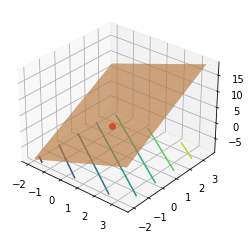

In [27]:
linearapprox(xs, ys, 1, 0, f1, grad_f1)

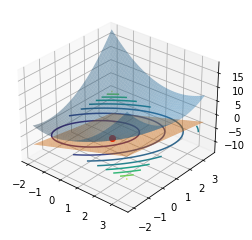

In [31]:
linearapprox(xs, ys, 1, 0, f2, grad_f2)

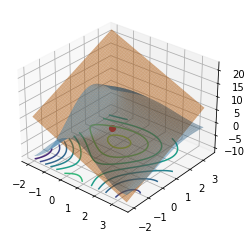

In [32]:
linearapprox(xs, ys, 1, 0, f3, grad_f3)

2.6493637346867365